In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import nltk
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
df1 = pd.read_csv(
    "Bitcoin_tweets.csv",
    sep=None,  # Let pandas auto-detect the delimiter
    engine='python',  # Use the Python engine for more flexibility
    on_bad_lines='skip',  # Skip lines that cause errors
    encoding='utf-8',  # Specify the encoding to handle special characters

)

df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [6]:
import pandas as pd

# Try to automatically detect the delimiter
df2 = pd.read_csv(
    "Bitcoin_tweets_dataset_2.csv",
    sep=None,  # Let pandas auto-detect the delimiter
    engine='python',  # Use the Python engine for more flexibility
    on_bad_lines='skip',  # Skip lines that cause errors
    encoding='utf-8'  # Specify the encoding to handle special characters
)

# Print the first few rows to inspect the data
df2.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ChefSam,Sunshine State,Culinarian | Hot Sauce Artisan | Kombucha Brew...,2011-03-23 03:50:13,4680.0,2643.0,6232,False,2023-03-01 23:59:59,Which #bitcoin books should I think about read...,['bitcoin'],Twitter for iPhone,False
1,Roy⚡️,NaN,Truth-seeking pleb 📚 • Science 🧪 • Nature 🌱☀️ ...,2022-01-30 17:41:41,770.0,1145.0,9166,False,2023-03-01 23:59:47,"@ThankGodForBTC I appreciate the message, but ...",['Bitcoin'],Twitter for iPhone,False
2,Ethereum Yoda,NaN,UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.,2022-07-24 04:50:18,576.0,1.0,0,False,2023-03-01 23:59:42,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",Twitter Web App,False
3,Viction,"Paris, France",https://t.co/8M3rgdjwEe\n\n#bitcoin #blockchai...,2010-03-26 10:15:26,236.0,1829.0,2195,False,2023-03-01 23:59:36,CoinDashboard v3.0 is here\nAvailable on ios a...,['Bitcoin'],Twitter for Android,False
4,Rosie,London,"The flower language of jasmine is loyalty, res...",2013-02-16 09:57:56,12731.0,46.0,134,False,2023-03-01 23:59:32,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"['Bitcoin', 'BTC']",Twitter Web App,False


In [9]:
print(df1.shape)
print(df2.shape)

(4693091, 13)
(174397, 13)


In [10]:
df_tweets = pd.concat([df1, df2],ignore_index=True)
df_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [11]:
df_tweets['date'] = pd.to_datetime(df_tweets['date'], errors='coerce')
df_tweets= df_tweets.dropna(subset=['date'])

In [12]:
lowest_date = df_tweets['date'].min()
highest_date = df_tweets['date'].max()

print("Lowest Date:", lowest_date)
print("Highest Date:", highest_date)

Lowest Date: 2021-02-05 10:52:04
Highest Date: 2023-03-05 23:59:56


In [13]:
df_tweets.dropna(axis=0 ,subset=['date','text'],inplace = True)
df_tweets.reset_index(drop= True,inplace=True)

df_tweets.drop_duplicates(inplace = True)
df_tweets.reset_index(drop=True,inplace=True)

df_tweets.shape

(4859004, 13)

In [14]:
df_tweets.drop(['user_description','user_created','user_friends','hashtags','source'],axis=1,inplace=True)

In [15]:
df_tweets["date"]=df_tweets["date"].dt.strftime("%Y-%m-%d")
df_tweets['date'] = pd.to_datetime(df_tweets['date'])

In [16]:
df_tweets.head()

,user_name,user_location,user_followers,user_favourites,user_verified,date,text,is_retweet
0,DeSota Wilson,"Atlanta, GA",8534.0,4838,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,False
1,CryptoND,NaN,6769.0,25483,False,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",False
2,Tdlmatias,"London, England",128.0,924,False,2021-02-10,"Guys evening, I have read this article about B...",False
3,Crypto is the future,NaN,625.0,14,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,1249.0,10482,False,2021-02-10,This network is secured by 9 508 nodes as of t...,False


In [17]:
df_tweets['year'] = df_tweets['date'].dt.year
df_tweets['month'] = df_tweets['date'].dt.month

In [18]:
df_tweets["year"].unique()
df_tweets["year"].value_counts()

year
2022    2628878
2021    1999523
2023     230603
Name: count, dtype: int64

C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\1098559522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_tweets["year"],palette='Set2')
C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\1098559522.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


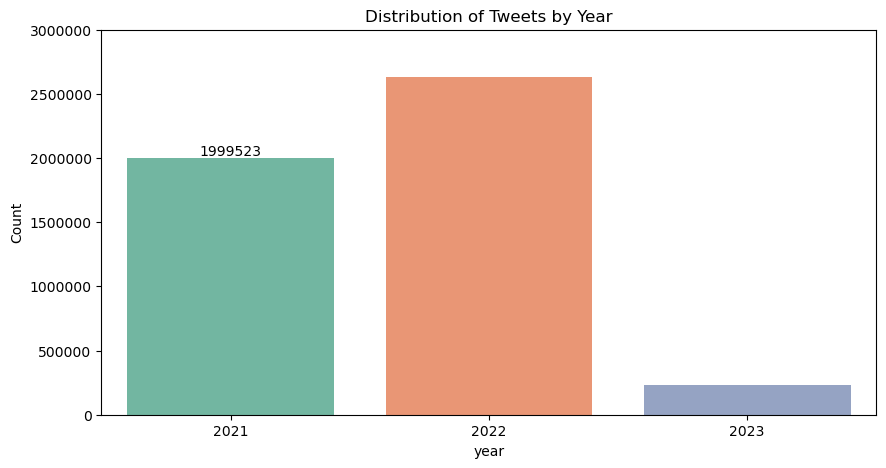

In [19]:
#plt.style.use('ggplot')
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax = sns.countplot(x=df_tweets["year"],palette='Set2')
ax.set_title("Distribution of Tweets by Year")

ax.bar_label(ax.containers[0], fmt='%d')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

y_ticks = ax.get_yticks()
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(y) for y in y_ticks])

#ax.set_xlabel('Ratings');
ax.set_ylabel('Count');

In [20]:
total_rows = len(df_tweets)
is_retweet_counts = df_tweets['is_retweet'].value_counts()

num_retweets = df_tweets['is_retweet'].sum()

print(f"Number of retweets: {num_retweets} out of {total_rows} tweets")

Number of retweets: 0 out of 4859004 tweets


In [21]:
df_tweets['user_favourites'] = pd.to_numeric(df_tweets['user_favourites'], errors='coerce')

df_tweets['user_favourites'] = df_tweets['user_favourites'].fillna(0)  # Replace NaN with 0, adjust as needed

df_tweets['user_favourites'] = df_tweets['user_favourites'].round(0).astype(int)

average_favourites = df_tweets['user_favourites'].mean()
median_favourites = df_tweets['user_favourites'].median()
max_favourites = df_tweets['user_favourites'].max()

print("Average number of likes per tweet:", round(average_favourites, 2))
print("Median number of likes per tweet:", median_favourites)
print("Maximum number of likes per tweet:", max_favourites)

Average number of likes per tweet: 6587.69
Median number of likes per tweet: 597.0
Maximum number of likes per tweet: 1567894


In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [42]:
#I created a word list for abbreviations
abbreviations = {
    "can't":"can not",
    "don't":"do not",
    "doesn't":"does not",
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [46]:
# A function that replaces abbreviations in the Abbreviations dictionary with their corresponding longer versions
def replace_abbreviations(text):
    # We check the words by separating the text by space
    words = text.split()
    # We go through each word, and if the word is in the dictionary, we get its equivalent
    for i in range(len(words)):
        if words[i] in abbreviations:
            # We replace the word with its counterpart
            words[i] = abbreviations[words[i]]
    # We recombine the modified words to form the text
    replaced_text = ' '.join(words)
    return replaced_text

df_tweets['processed_text'] = df_tweets['text'].apply(replace_abbreviations)

In [48]:
df_tweets['processed_text']

0          Blue Ridge Bank shares halted by NYSE after #b...
1          😎 Today, that's this #Thursday, we will do a "...
2          Guys evening, I have read this article about B...
3          $BTC A big chance in a billion! Price: \487264...
4          This network is secured by 9 508 nodes as of t...
                                 ...                        
4858999    #BTC Price $22338 -RSI: 52 -Moving Average(20)...
4859000    Jack Dorsey’s TBD launches ‘C=’ to improve Bit...
4859001    @TheBlock__ Every holder in Celsius fcked 🤓 Th...
4859002    #btc #altcoin #short https://t.co/cAoqF22klA v...
4859003    Perfect platform for private trading our prior...
Name: processed_text, Length: 4859004, dtype: object

In [50]:
# Text pre-processing
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import wordnet as wn
import nltk
import re

nltk.download('wordnet')
nltk.download('omw-1.4')

# Creating Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')


def clean_text(text_column):
    # Function to remove HTTP links
    def remove_http_links(text):
        return re.sub(r'http\S+', '', text)

    # Remove HTTP links from the text column
    text_column = text_column.apply(remove_http_links)
    
    # Convert a column of text to lowercase
    text_column = text_column.astype(str).str.lower() 
    
    # Removing punctuation marks
    text_column = text_column.str.replace('[^\w\s]', ' ', regex=True)

    # Strip newline characters
    text_column = text_column.str.replace('\n', ' ')

    # Subtracting numbers
    text_column = text_column.str.replace('\d+', ' ', regex=True)

    # Remove carriage return characters
    text_column = text_column.str.replace('\r', ' ')

    # Lemmatization and stemming operations
    def lemmatize_stem(text):
        # Tokenize words
        words = text.split()
        # Lemmatization and stemming operations
        words = [lemmatizer.lemmatize(word) for word in words]
        #words = [stemmer.stem(word) for word in words]
        # Combine words
        return ' '.join(words)

    # Apply lemmatization and stemming operations to a text column
    text_column = text_column.apply(lemmatize_stem)

    return text_column

df_tweets["processed_text"] = clean_text(df_tweets["processed_text"])

<>:27: SyntaxWarning: invalid escape sequence '\w'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\w'
<>:33: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\167495987.py:27: SyntaxWarning: invalid escape sequence '\w'
  text_column = text_column.str.replace('[^\w\s]', ' ', regex=True)
C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\167495987.py:33: SyntaxWarning: invalid escape sequence '\d'
  text_column = text_column.str.replace('\d+', ' ', regex=True)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...


In [52]:
from nltk.corpus import stopwords
!pip install stop-words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32917 sha256=289811ac6fdc50b6b5aee1847e6b7df2171b72697d44c0cf3829a24845fe5a04
  Stored in directory: c:\users\parth\appdata\local\pip\cache\wheels\98\8d\87\5894deb0270ab49fc65555daa606a7d1dfa144f456bb9e0795
Successfully built stop-words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
df=df_tweets

In [58]:
def remove_stopwords(text):
    # Loading stop words in English
    stop_words = set(stopwords.words('english'))

    # Breaking text into word lists
    words = text.split()

    # Removing stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Merge cleaned text
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

df["processed_text"] = df["processed_text"].apply(remove_stopwords)


In [72]:
df

,user_name,user_location,user_followers,user_favourites,user_verified,date,text,is_retweet,year,month,processed_text
0,DeSota Wilson,"Atlanta, GA",8534.0,4838,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,False,2021,2,blue ridge bank share halted nyse bitcoin atm ...
1,CryptoND,NaN,6769.0,25483,False,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",False,2021,2,today thursday take friend leowandersleb btc w...
2,Tdlmatias,"London, England",128.0,924,False,2021-02-10,"Guys evening, I have read this article about B...",False,2021,2,guy evening read article btc would like share
3,Crypto is the future,NaN,625.0,14,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,False,2021,2,btc big chance billion price bitcoin fx btc cr...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,1249.0,10482,False,2021-02-10,This network is secured by 9 508 nodes as of t...,False,2021,2,network secured node today soon biggest bear r...
...,...,...,...,...,...,...,...,...,...,...,...
4858999,GameFiDash | P2E Game | NFT | Web 3.0,NaN,1633.0,823,False,2023-03-04,#BTC Price $22338\n\n-RSI: 52\n-Moving Average...,False,2023,3,btc price rsi moving average bollinger b lower...
4859000,Niklas Feurstein,Austria,7448.0,7341,False,2023-03-04,Jack Dorsey’s TBD launches ‘C=’ to improve Bit...,False,2023,3,jack dorsey tbd launch c improve bitcoin light...
4859001,ERROR.404 💱,SUPREME ORDER OF T.,421.0,20128,False,2023-03-04,@TheBlock__ Every holder in Celsius fcked 🤓\nT...,False,2023,3,theblock__ every holder celsius fcked converti...
4859002,AI_Cryptominati/100x-1000x gems,sweden,672.0,465,False,2023-03-04,#btc #altcoin #short https://t.co/cAoqF22klA v...,False,2023,3,btc altcoin short via youtube btc price update


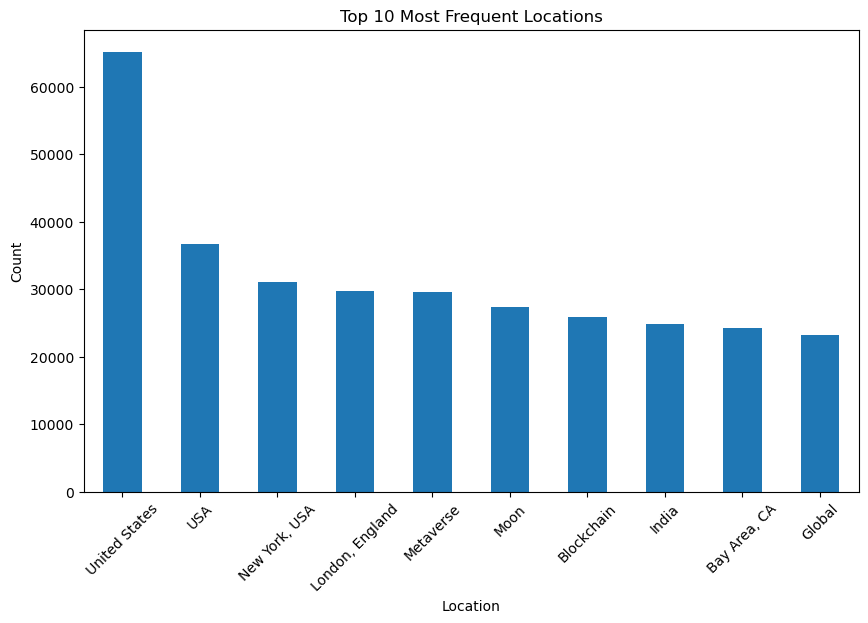

In [59]:
# Calculate the top 10 most frequently occurring locations in the 'user_location' column
top_locations = df['user_location'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar')
plt.title('Top 10 Most Frequent Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [68]:
! pip install vaderSentiment pandas_datareader textblob yfinance

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 29.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139126 sha256=78d4278bb8bc91ac14201712ca31eea280846c186a51438a612f7638b38e4fc4
  Stored in directory: c:\users\parth\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [88]:
vader_sentiment = {}

vader_sentiment = pd.DataFrame(vader_sentiment)

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return analyzer.polarity_scores(text)

vader_sentiment['sentiment'] = df['text'].apply(analyze_sentiment)

In [90]:
vader_sentiment['neg'] = vader_sentiment['sentiment'].apply(lambda x: x['neg'])
vader_sentiment['neu'] = vader_sentiment['sentiment'].apply(lambda x: x['neu'])
vader_sentiment['pos'] = vader_sentiment['sentiment'].apply(lambda x: x['pos'])
vader_sentiment['compound'] = vader_sentiment['sentiment'].apply(lambda x: x['compound'])

vader_sentiment['cleantext'] = df['processed_text']
vader_sentiment['date'] = df['date']

In [91]:
vader_sentiment

,sentiment,neg,neu,pos,compound,cleantext
0,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.000,0.855,0.145,0.2960,blue ridge bank share halted nyse bitcoin atm ...
1,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.000,0.728,0.272,0.8225,today thursday take friend leowandersleb btc w...
2,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.000,0.793,0.207,0.5719,guy evening read article btc would like share
3,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.000,0.859,0.141,0.3164,btc big chance billion price bitcoin fx btc cr...
4,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'comp...",0.000,0.895,0.105,0.4019,network secured node today soon biggest bear r...
...,...,...,...,...,...,...
4858999,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,btc price rsi moving average bollinger b lower...
4859000,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.000,0.805,0.195,0.4404,jack dorsey tbd launch c improve bitcoin light...
4859001,"{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'comp...",0.108,0.892,0.000,-0.4184,theblock__ every holder celsius fcked converti...
4859002,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,btc altcoin short via youtube btc price update


In [94]:
def sntmnt_vader(a):
    if a < 0:
        return 'negative'
    elif a >0:
        return 'positive'
    else:
        return 'neutral'
    
vader_sentiment['sentiment'] = vader_sentiment['compound'].map(sntmnt_vader)

vader_sentiment['sentiment'].value_counts()

sentiment
positive    2544382
neutral     1530644
negative     783978
Name: count, dtype: int64

C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\1300093939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(vader_sentiment['compound'][vader_sentiment['sentiment'] == "positive"], label='Not Hate Speech', color="blue")
C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\1300093939.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

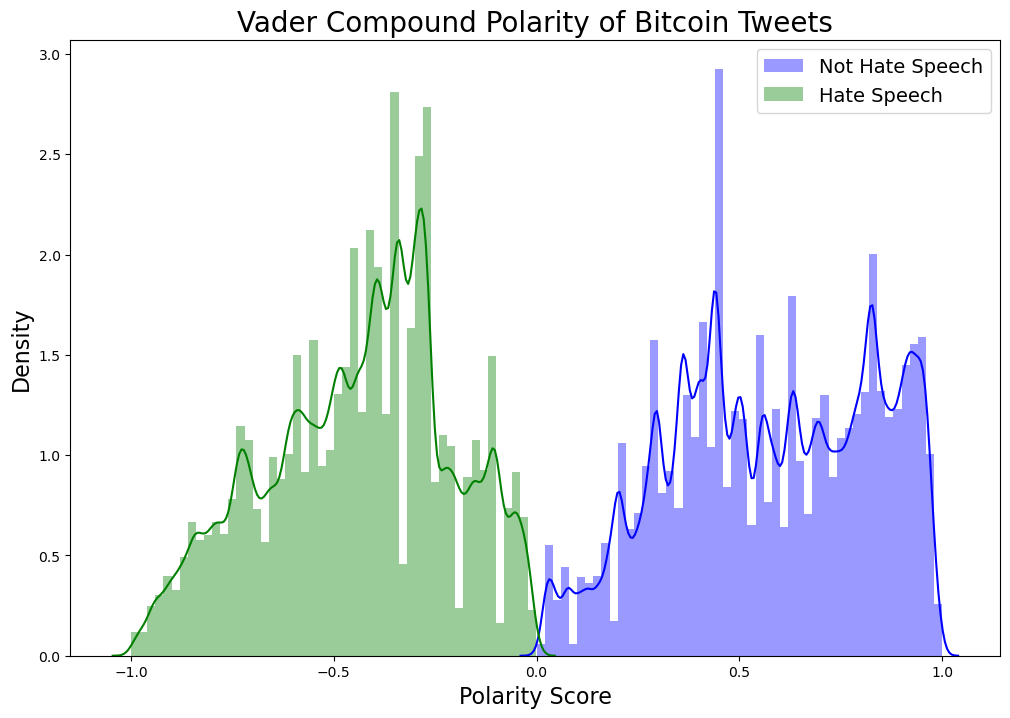

In [99]:
plt.figure(figsize=(12, 8))
ax = sns.distplot(vader_sentiment['compound'][vader_sentiment['sentiment'] == "positive"], label='Not Hate Speech', color="blue")
ax = sns.distplot(vader_sentiment['compound'][vader_sentiment['sentiment'] == "negative"], label='Hate Speech', color = "green")
# setting label, title and legend
ax.set_title('Vader Compound Polarity of Bitcoin Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Polarity Score', fontsize=16)
ax.legend(prop=dict(size=14))

C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\2551576842.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(vader_sentiment['pos'][vader_sentiment['sentiment'] == "positive"], label='Not Hate Speech', color="blue")
C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\2551576842.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

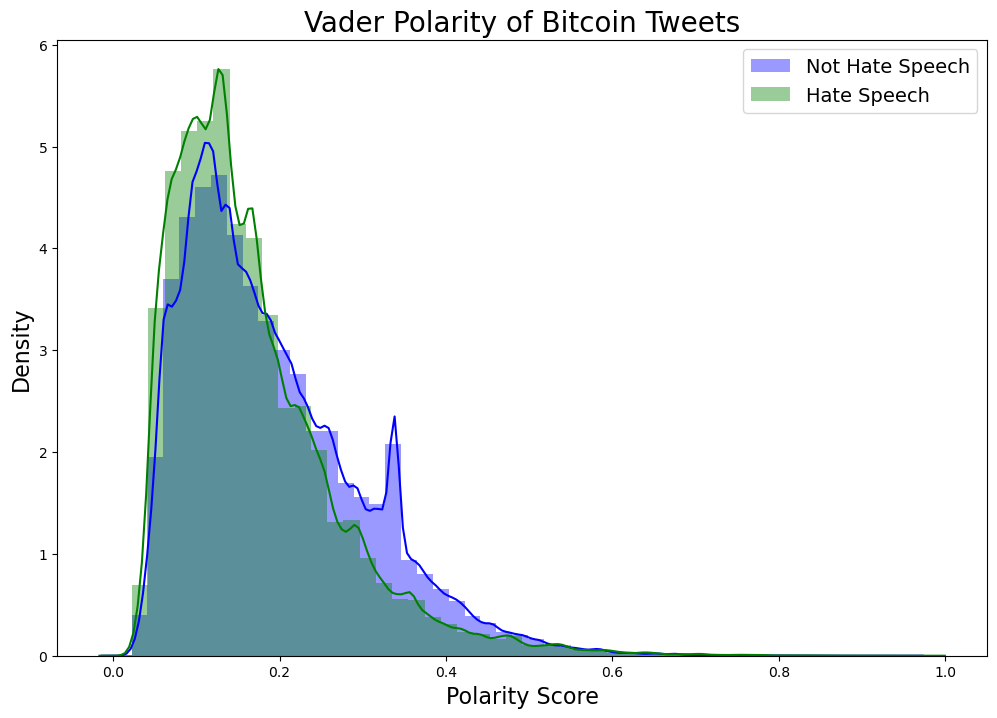

In [101]:
# creating density plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(vader_sentiment['pos'][vader_sentiment['sentiment'] == "positive"], label='Not Hate Speech', color="blue")
ax = sns.distplot(vader_sentiment['neg'][vader_sentiment['sentiment'] == "negative"], label='Hate Speech', color = "green")
# setting label, title and legend
ax.set_title('Vader Polarity of Bitcoin Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Polarity Score', fontsize=16)
ax.legend(prop=dict(size=14))

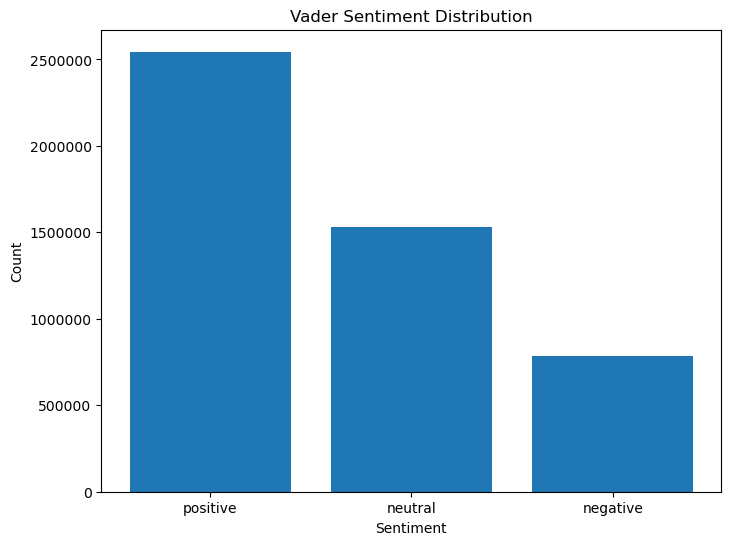

In [116]:
import matplotlib.pyplot as plt

sentiment_counts = vader_sentiment['sentiment'].value_counts()

plt.figure(figsize=(8, 6),dpi=100)
plt.bar(sentiment_counts.index, sentiment_counts.values)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Vader Sentiment Distribution')

plt.grid(False)

# Eksen etiketlerinin formatını belirleme
plt.ticklabel_format(style='plain', axis='y')

plt.show()
#plt.savefig('sentiment_distribution.png', dpi=300)

C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\3304010847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=vader_sentiment["sentiment"],palette='pastel')
C:\Users\Parth\AppData\Local\Temp\ipykernel_19060\3304010847.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


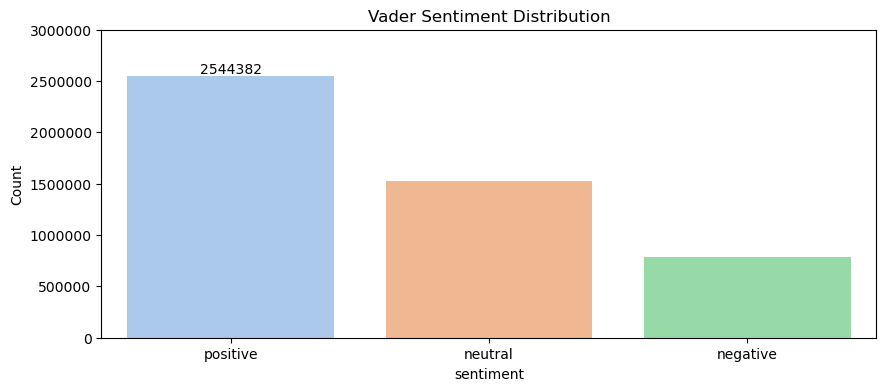

In [114]:
#plt.style.use('ggplot')
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(111)
ax = sns.countplot(x=vader_sentiment["sentiment"],palette='pastel')
ax.set_title("Vader Sentiment Distribution")

    
ax.bar_label(ax.containers[0], fmt='%d')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

y_ticks = ax.get_yticks()
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(y) for y in y_ticks])

#ax.set_xlabel('Ratings');
ax.set_ylabel('Count');

In [ ]:
# Load Bitcoin price data
btc_data = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")
btc_data = btc_data[['Close']]  # Using closing price for prediction

# Load Twitter sentiment data (assumed to have a 'Sentiment_Score' column)
twitter_data = pd.read_csv("twitter_sentiments.csv", parse_dates=["Date"], index_col="Date")

# Merge datasets on date
data = btc_data.merge(twitter_data, left_index=True, right_index=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Prepare dataset for LSTM
X, y = [], []
window_size = 30  # Number of previous days to consider

for i in range(len(data_scaled) - window_size):
    X.append(data_scaled[i:i+window_size])
    y.append(data_scaled[i+window_size, 0])  # Predicting Bitcoin closing price

X, y = np.array(X), np.array(y)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], data.shape[1] - 1)))))[:, 0]

# Save the model
model.save("bitcoin_sentiment_prediction.h5")

# Display results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(btc_data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Price")
plt.plot(btc_data.index[-len(predictions):], predictions, label="Predicted Price", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged dataset
correlation = data.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Sentiment and Bitcoin Price")
plt.show()


In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Bitcoin Price Line (Primary Y-Axis)
ax1.set_xlabel("Date")
ax1.set_ylabel("Bitcoin Price", color="blue")
ax1.plot(data.index, data["Close"], color="blue", label="Bitcoin Price")
ax1.tick_params(axis="y", labelcolor="blue")

# Sentiment Score Line (Secondary Y-Axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Twitter Sentiment", color="red")
ax2.plot(data.index, data["Sentiment_Score"], color="red", linestyle="dashed", label="Twitter Sentiment")
ax2.tick_params(axis="y", labelcolor="red")

fig.tight_layout()
plt.title("Bitcoin Price vs. Twitter Sentiment Over Time")
plt.legend()
plt.show()
